# 투빅스 15기 정규세션 Week1 EDA - 15기 황보진경

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

## 1. Load Data

In [2]:
dat = pd.read_csv("과제데이터.csv", encoding="UTF8")
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
print('data shape : {}'.format(dat.shape))
dat.describe() # numeric variable에 대한 정보 출력

data shape : (10886, 12)


season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [4]:
dat.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

## 2. Preprocessing

In [5]:
from datetime import datetime

dat = dat.astype({'datetime': 'str'})
# datetime을 date와 time으로 분리하였다.
dat['date'] = dat.datetime.apply(lambda x: x.split(' ')[0])
dat['time'] = dat.datetime.apply(lambda x: x.split(' ')[1])
# 기존의 datetime column은 삭제하였다.
dat.drop(['datetime'], axis = 'columns', inplace=True)

# Categorical Feature들은 가독성을 위해 의미가 있는 String으로 바꿔주었다.
dat['season']=dat.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}) 
dat['weather']=dat.weather.map({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'}) 
dat['holiday']=dat.holiday.map({0:'False',1:'True'}) 
dat['workingday']=dat.workingday.map({0:'False',1:'True'}) 
dat.head()

season holiday workingday weather  temp   atemp  humidity  windspeed  \
0  Spring   False      False   Clear  9.84  14.395        81        0.0   
1  Spring   False      False   Clear  9.02  13.635        80        0.0   
2  Spring   False      False   Clear  9.02  13.635        80        0.0   
3  Spring   False      False   Clear  9.84  14.395        75        0.0   
4  Spring   False      False   Clear  9.84  14.395        75        0.0   

   casual  registered  count        date      time  
0       3          13     16  2011-01-01  00:00:00  
1       8          32     40  2011-01-01  01:00:00  
2       5          27     32  2011-01-01  02:00:00  
3       3          10     13  2011-01-01  03:00:00  
4       0           1      1  2011-01-01  04:00:00

In [6]:
dat.rename(columns={'count':'total'}, inplace=True)

In [7]:
# Column별로 unique한 데이터의 개수를 출력하였다. 
# 이 때, unique한 데이터의 개수가 너무 많으면 앞과 뒤에서 5개씩만 print한다.
print('<Unique Value per Columns>')
for i in dat.columns:
    if i == 'datetime':
        continue
    print('*{} : {}'.format(i, len(np.unique(dat[i]))), end = '\n\t')
    if (len(np.unique(dat[i])) > 10):
        print(np.unique(dat[i])[:5], end ='...')
        print(np.unique(dat[i])[-5:])
    else:
        print(np.unique(dat[i]))

<Unique Value per Columns>
*season : 4
	['Fall' 'Spring' 'Summer' 'Winter']
*holiday : 2
	['False' 'True']
*workingday : 2
	['False' 'True']
*weather : 4
	['Clear' 'Cloudy' 'Heavy Rain' 'Light Rain']
*temp : 49
	[0.82 1.64 2.46 3.28 4.1 ]...[36.9  37.72 38.54 39.36 41.  ]
*atemp : 60
	[0.76  1.515 2.275 3.03  3.79 ]...[42.425 43.18  43.94  44.695 45.455]
*humidity : 89
	[ 0  8 10 12 13]...[ 93  94  96  97 100]
*windspeed : 28
	[ 0.      6.0032  7.0015  8.9981 11.0014]...[46.0022 47.9988 50.0021 51.9987 56.9969]
*casual : 309
	[0 1 2 3 4]...[356 357 361 362 367]
*registered : 731
	[0 1 2 3 4]...[812 833 839 857 886]
*total : 822
	[1 2 3 4 5]...[943 948 968 970 977]
*date : 456
	['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05']...['2012-12-15' '2012-12-16' '2012-12-17' '2012-12-18' '2012-12-19']
*time : 24
	['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00']...['19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00']


In [8]:
# time에서 분이 의미있는 경우가 없으므로 시간부분만 int로 저장하였다.
# date는 년월일을 분리한다.
dat['time'] = dat.time.apply(lambda x:int(x[0:2]))
dat['year'] = dat.date.apply(lambda x: int(x[:4]))
dat['month'] = dat.date.apply(lambda x: int(x[5:7]))
dat['day'] = dat.date.apply(lambda x: int(x[8:10]))
# dat.drop(['date'], axis = 'columns', inplace=True)

# 실제온도와 체감온도의 차이를 의미하는 새로운 feature를 도입한 후, 체감온도 column은 삭제한다.
dat['temp_diff'] = dat.temp - dat.atemp
dat.drop(['atemp'], axis = 'columns', inplace=True)

In [9]:
dat.head()

season holiday workingday weather  temp  humidity  windspeed  casual  \
0  Spring   False      False   Clear  9.84        81        0.0       3   
1  Spring   False      False   Clear  9.02        80        0.0       8   
2  Spring   False      False   Clear  9.02        80        0.0       5   
3  Spring   False      False   Clear  9.84        75        0.0       3   
4  Spring   False      False   Clear  9.84        75        0.0       0   

   registered  total        date  time  year  month  day  temp_diff  
0          13     16  2011-01-01     0  2011      1    1     -4.555  
1          32     40  2011-01-01     1  2011      1    1     -4.615  
2          27     32  2011-01-01     2  2011      1    1     -4.615  
3          10     13  2011-01-01     3  2011      1    1     -4.555  
4           1      1  2011-01-01     4  2011      1    1     -4.555

In [10]:
dat.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
total         0
date          0
time          0
year          0
month         0
day           0
temp_diff     0
dtype: int64

In [11]:
dat[dat.humidity==0]

season holiday workingday     weather   temp  humidity  windspeed  \
1091  Spring   False       True  Light Rain  13.94         0    16.9979   
1092  Spring   False       True  Light Rain  13.94         0    16.9979   
1093  Spring   False       True  Light Rain  13.94         0    16.9979   
1094  Spring   False       True  Light Rain  14.76         0    12.9980   
1095  Spring   False       True  Light Rain  14.76         0    22.0028   
1096  Spring   False       True  Light Rain  15.58         0    15.0013   
1097  Spring   False       True  Light Rain  15.58         0    19.0012   
1098  Spring   False       True  Light Rain  16.40         0    15.0013   
1099  Spring   False       True  Light Rain  16.40         0    11.0014   
1100  Spring   False       True  Light Rain  16.40         0    16.9979   
1101  Spring   False       True  Light Rain  17.22         0    15.0013   
1102  Spring   False       True  Light Rain  17.22         0    15.0013   
1103  Spring   False       True  Light Rain  18.04         0    19.9995   
1104  Spring   False       True  Light Rain  18.04         0    15.0013   
1105  Spring   False       True  Light Rain  17.22         0    16.9979   
1106  Spring   False       True      Cloudy  18.04         0    26.0027   
1107  Spring   False       True  Light Rain  18.04         0    23.9994   
1108  Spring   False       True  Light Rain  18.04         0    39.0007   
1109  Spring   False       True  Light Rain  14.76         0    22.0028   
1110  Spring   False       True  Light Rain  14.76         0    15.0013   
1111  Spring   False       True      Cloudy  13.94         0     8.9981   
1112  Spring   False       True  Light Rain  13.94         0     6.0032   

      casual  registered  total        date  time  year  month  day  temp_diff  
1091       3           0      3  2011-03-10     0  2011      3   10     -1.970  
1092       0           2      2  2011-03-10     1  2011      3   10     -1.970  
1093       0           1      1  2011-03-10     2  2011      3   10     -1.970  
1094       1           2      3  2011-03-10     5  2011      3   10     -2.665  
1095       0          12     12  2011-03-10     6  2011      3   10     -1.905  
1096       1          36     37  2011-03-10     7  2011      3   10     -4.115  
1097       1          43     44  2011-03-10     8  2011      3   10     -4.115  
1098       1          23     24  2011-03-10     9  2011      3   10     -4.055  
1099       0          17     17  2011-03-10    10  2011      3   10     -4.055  
1100       6           5     11  2011-03-10    11  2011      3   10     -4.055  
1101       4          30     34  2011-03-10    12  2011      3   10     -3.990  
1102       1          11     12  2011-03-10    13  2011      3   10     -3.990  
1103       0          12     12  2011-03-10    14  2011      3   10     -3.930  
1104       3          11     14  2011-03-10    15  2011      3   10     -3.930  
1105       1          20     21  2011-03-10    16  2011      3   10     -3.990  
1106       2         109    111  2011-03-10    17  2011      3   10     -3.930  
1107       2          80     82  2011-03-10    18  2011      3   10     -3.930  
1108       5          51     56  2011-03-10    19  2011      3   10     -3.930  
1109       9          29     38  2011-03-10    20  2011      3   10     -1.905  
1110       1          27     28  2011-03-10    21  2011      3   10     -2.665  
1111       4          30     34  2011-03-10    22  2011      3   10     -2.725  
1112       1          26     27  2011-03-10    23  2011      3   10     -3.485

2011년 3월 10일이 모두 습도가 0으로 설정되어 있어, 평균치를 넣어주었습니다.

In [12]:
dat[dat.humidity==0].humidity = dat[dat.humidity!=0].humidity.mean()

In [ ]:
# 날짜별 풍속 그래프를  그려본 결과 0 값은 너무 풍속이 낮아 측정되지 않은 경우로 추정됩니다.
# 캐글 discussion을 통해서도 풍속이 5미만인 경우 0으로 값이 나온 것 같다는 논의가 이뤄짐.
# 극단적인 이상치나 결측치는 아니라고 판단하여 따로 처리하지 않았습니다.
# output log는 자리를 너무 많이 차지해 삭제하였습니다.
for i in np.unique(dat.date):
    plt.title(i+" Windspeed")
    plt.plot(dat[dat.date == i].windspeed)
    plt.show()

Text(0.5, 0.98, 'Histogram per Column')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


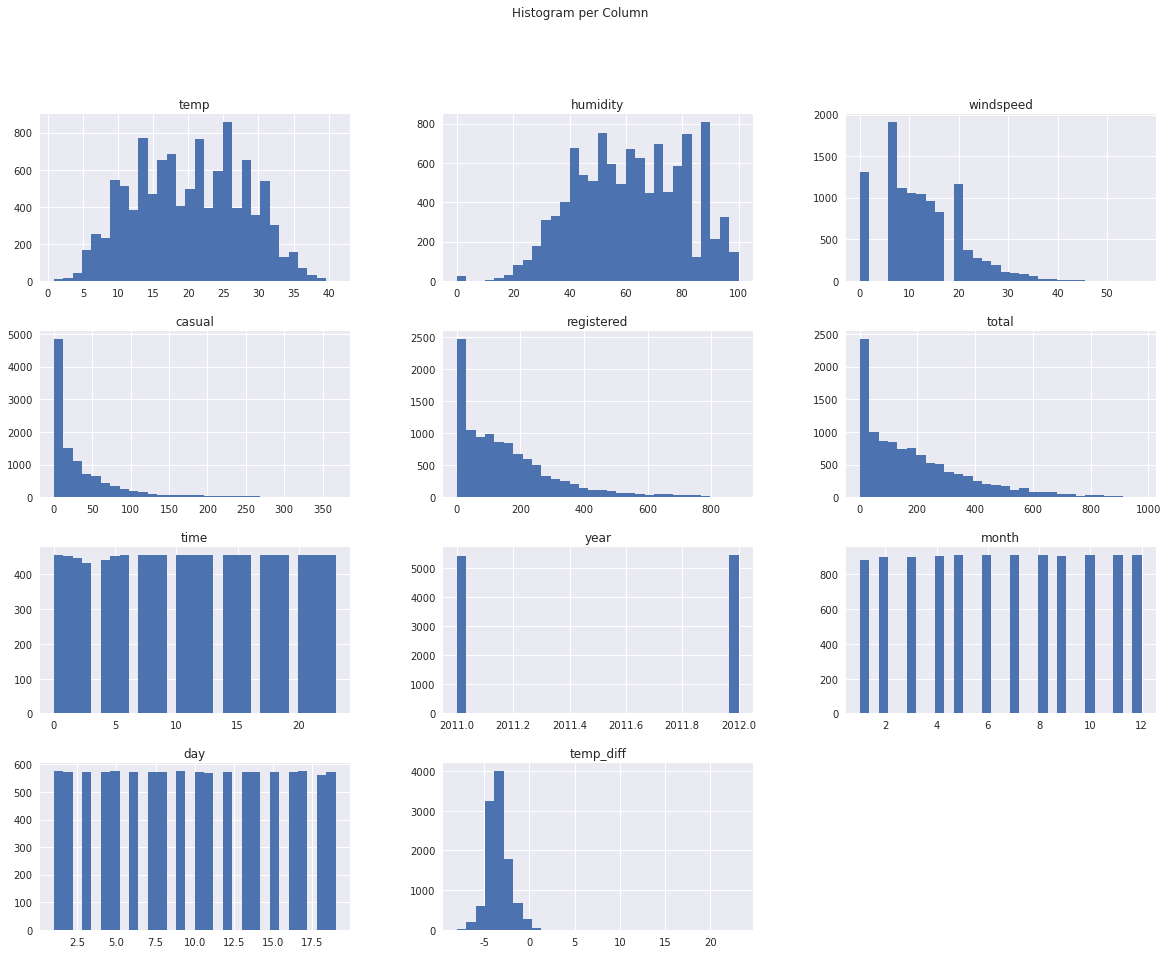

In [13]:
dat[dat.columns].hist(bins=30, figsize=(20,15))
plt.suptitle("Histogram per Column", fontsize=12)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


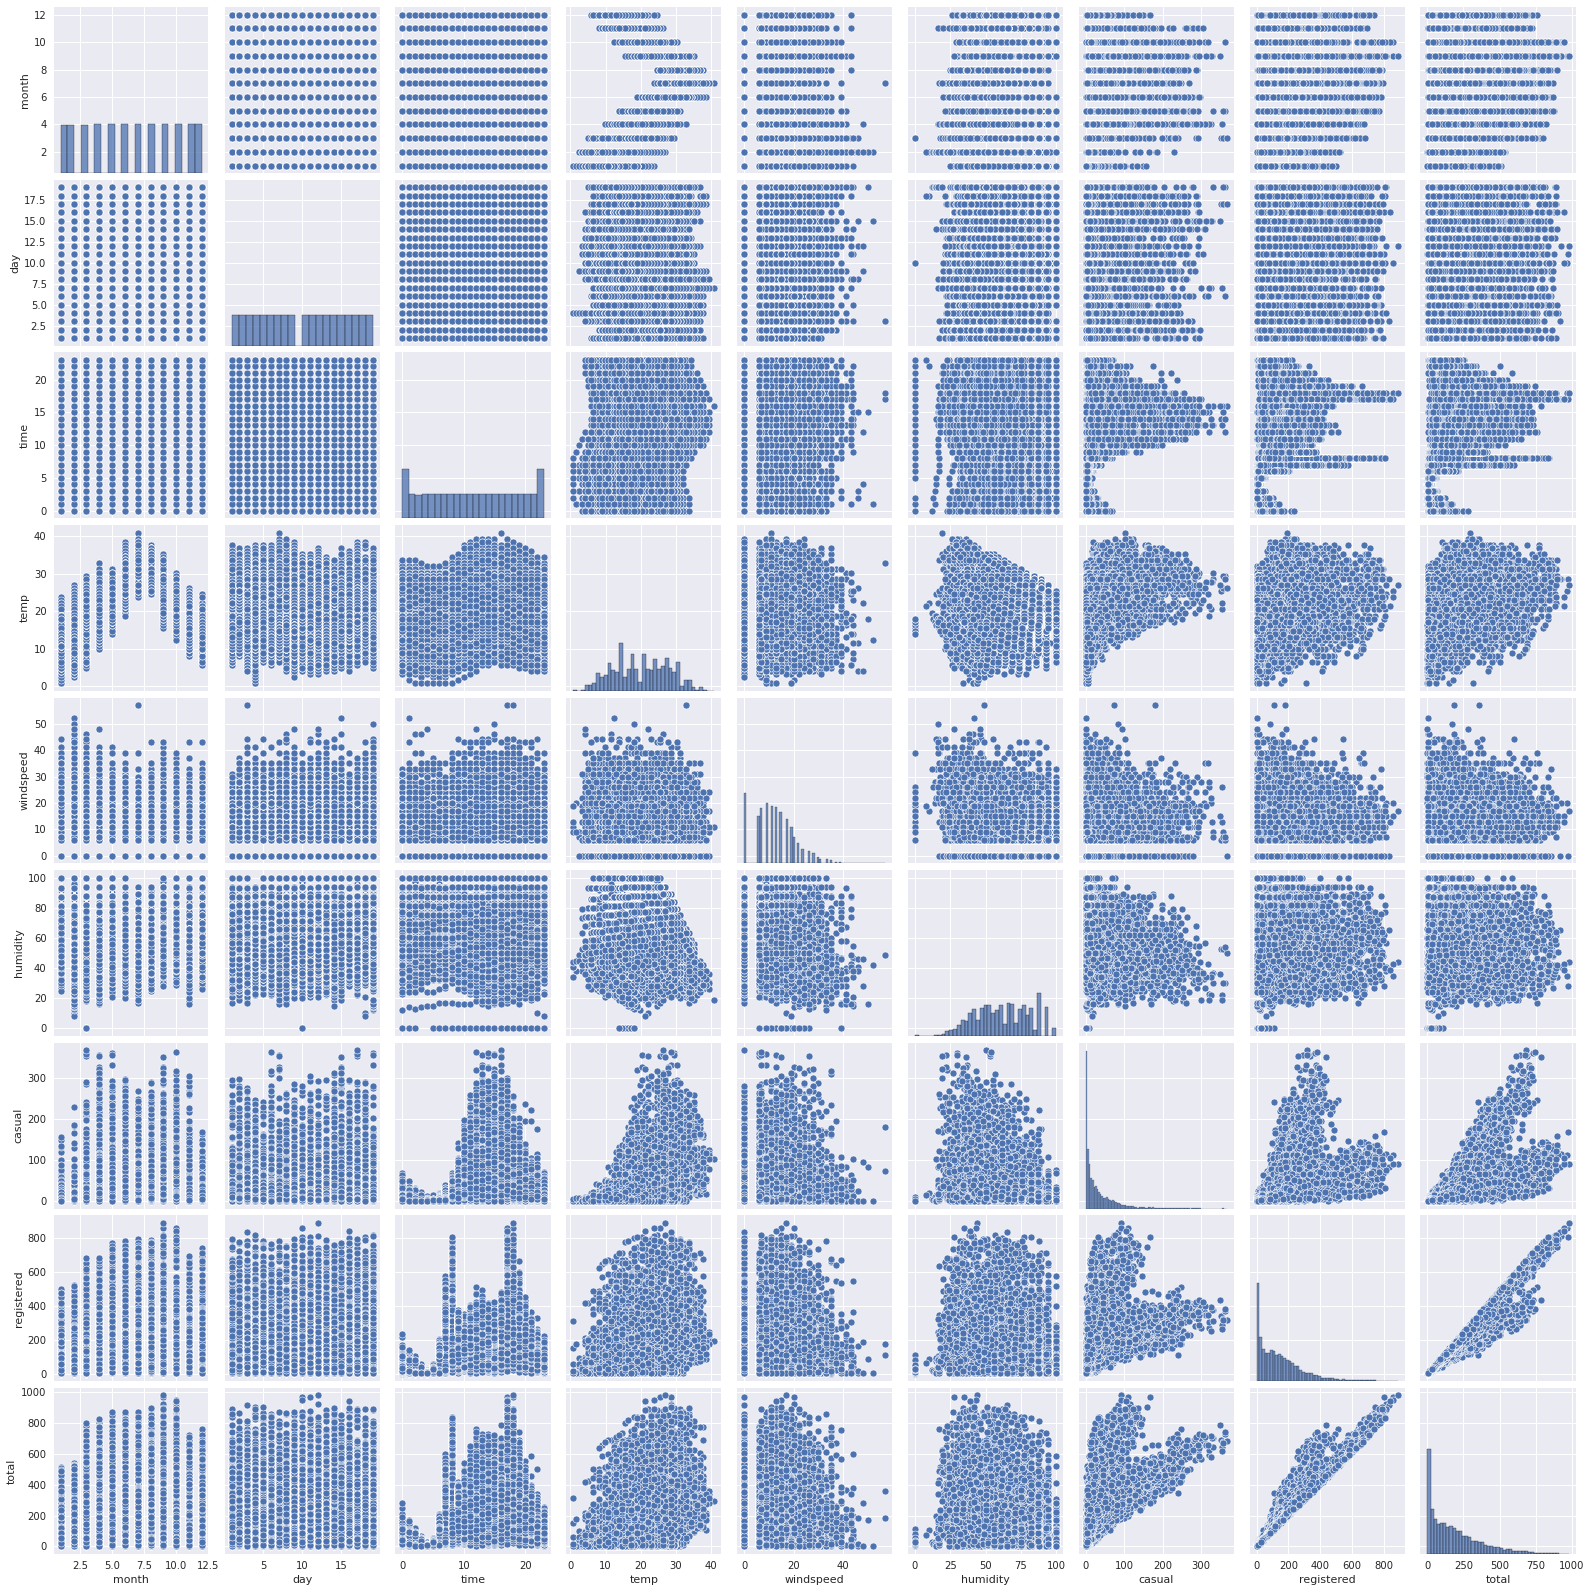

In [14]:
numatt = ['month', 'day', 'time', 'temp', 'windspeed', 'humidity', 'casual', 'registered', 'total' ]
sns.pairplot(dat[numatt]) # 이상치 제거 후 각 변수 분포 및 변수간 scatter plot 작성
plt.show()

In [15]:
dat[numatt].corr()

month       day      time      temp  windspeed  humidity  \
month       1.000000  0.001974 -0.006818  0.257589  -0.150192  0.204537   
day         0.001974  1.000000  0.001132  0.015551   0.036157 -0.011335   
time       -0.006818  0.001132  1.000000  0.145430   0.146631 -0.278011   
temp        0.257589  0.015551  0.145430  1.000000  -0.017852 -0.064949   
windspeed  -0.150192  0.036157  0.146631 -0.017852   1.000000 -0.318607   
humidity    0.204537 -0.011335 -0.278011 -0.064949  -0.318607  1.000000   
casual      0.092722  0.014109  0.302045  0.467097   0.092276 -0.348187   
registered  0.169451  0.019111  0.380540  0.318571   0.091052 -0.265458   
total       0.166862  0.019826  0.400601  0.394454   0.101369 -0.317371   

              casual  registered     total  
month       0.092722    0.169451  0.166862  
day         0.014109    0.019111  0.019826  
time        0.302045    0.380540  0.400601  
temp        0.467097    0.318571  0.394454  
windspeed   0.092276    0.091052  0.101369  
humidity   -0.348187   -0.265458 -0.317371  
casual      1.000000    0.497250  0.690414  
registered  0.497250    1.000000  0.970948  
total       0.690414    0.970948  1.000000

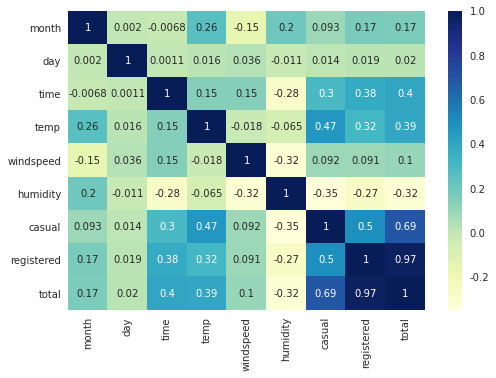

In [16]:
sns.heatmap(dat[numatt].corr(),cmap='YlGnBu', annot=True)
plt.show()

`total`에 영향을 미치는 feature들로는 `time, temp, humidity`가 있다.

In [31]:
epsillon = 1 # log0을 막기 위해 epsillon을 더해준다.
dat['log_registered'] = np.log(dat.registered+epsillon) #feature1
dat['log_casual'] = np.log(dat.casual+epsillon) #feature2
dat['log_total'] = np.log(dat['total']+epsillon) #feature3

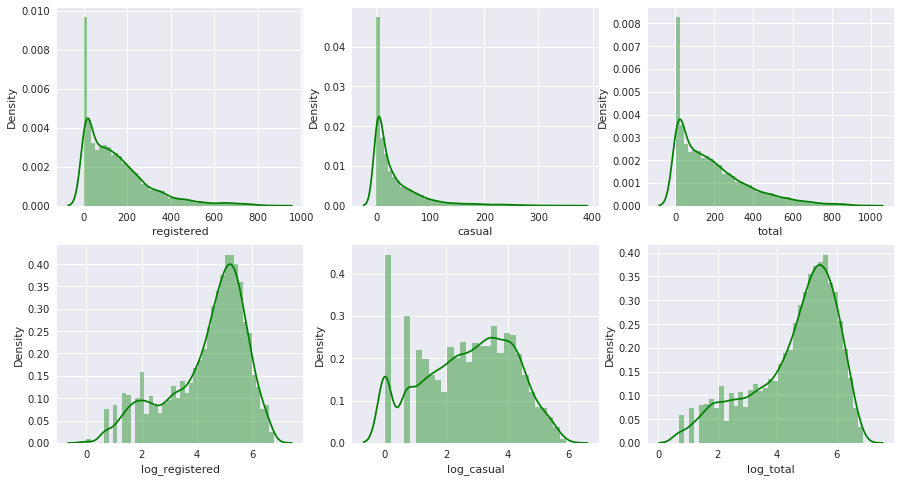

In [32]:
f, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,8))
sns.distplot(dat['registered'], ax=axes[0][0], color="g")
sns.distplot(dat['log_registered'], ax=axes[1][0], color="g")
sns.distplot(dat['casual'], ax=axes[0][1], color="g")
sns.distplot(dat['log_casual'], ax=axes[1][1], color="g")
sns.distplot(dat['total'], ax=axes[0][2], color="g")
sns.distplot(dat['log_total'], ax=axes[1][2], color="g")
plt.show()

log변환을 한 결과, 왼쪽으로 치우친 현상이 완화됨을 확인할 수 있다.

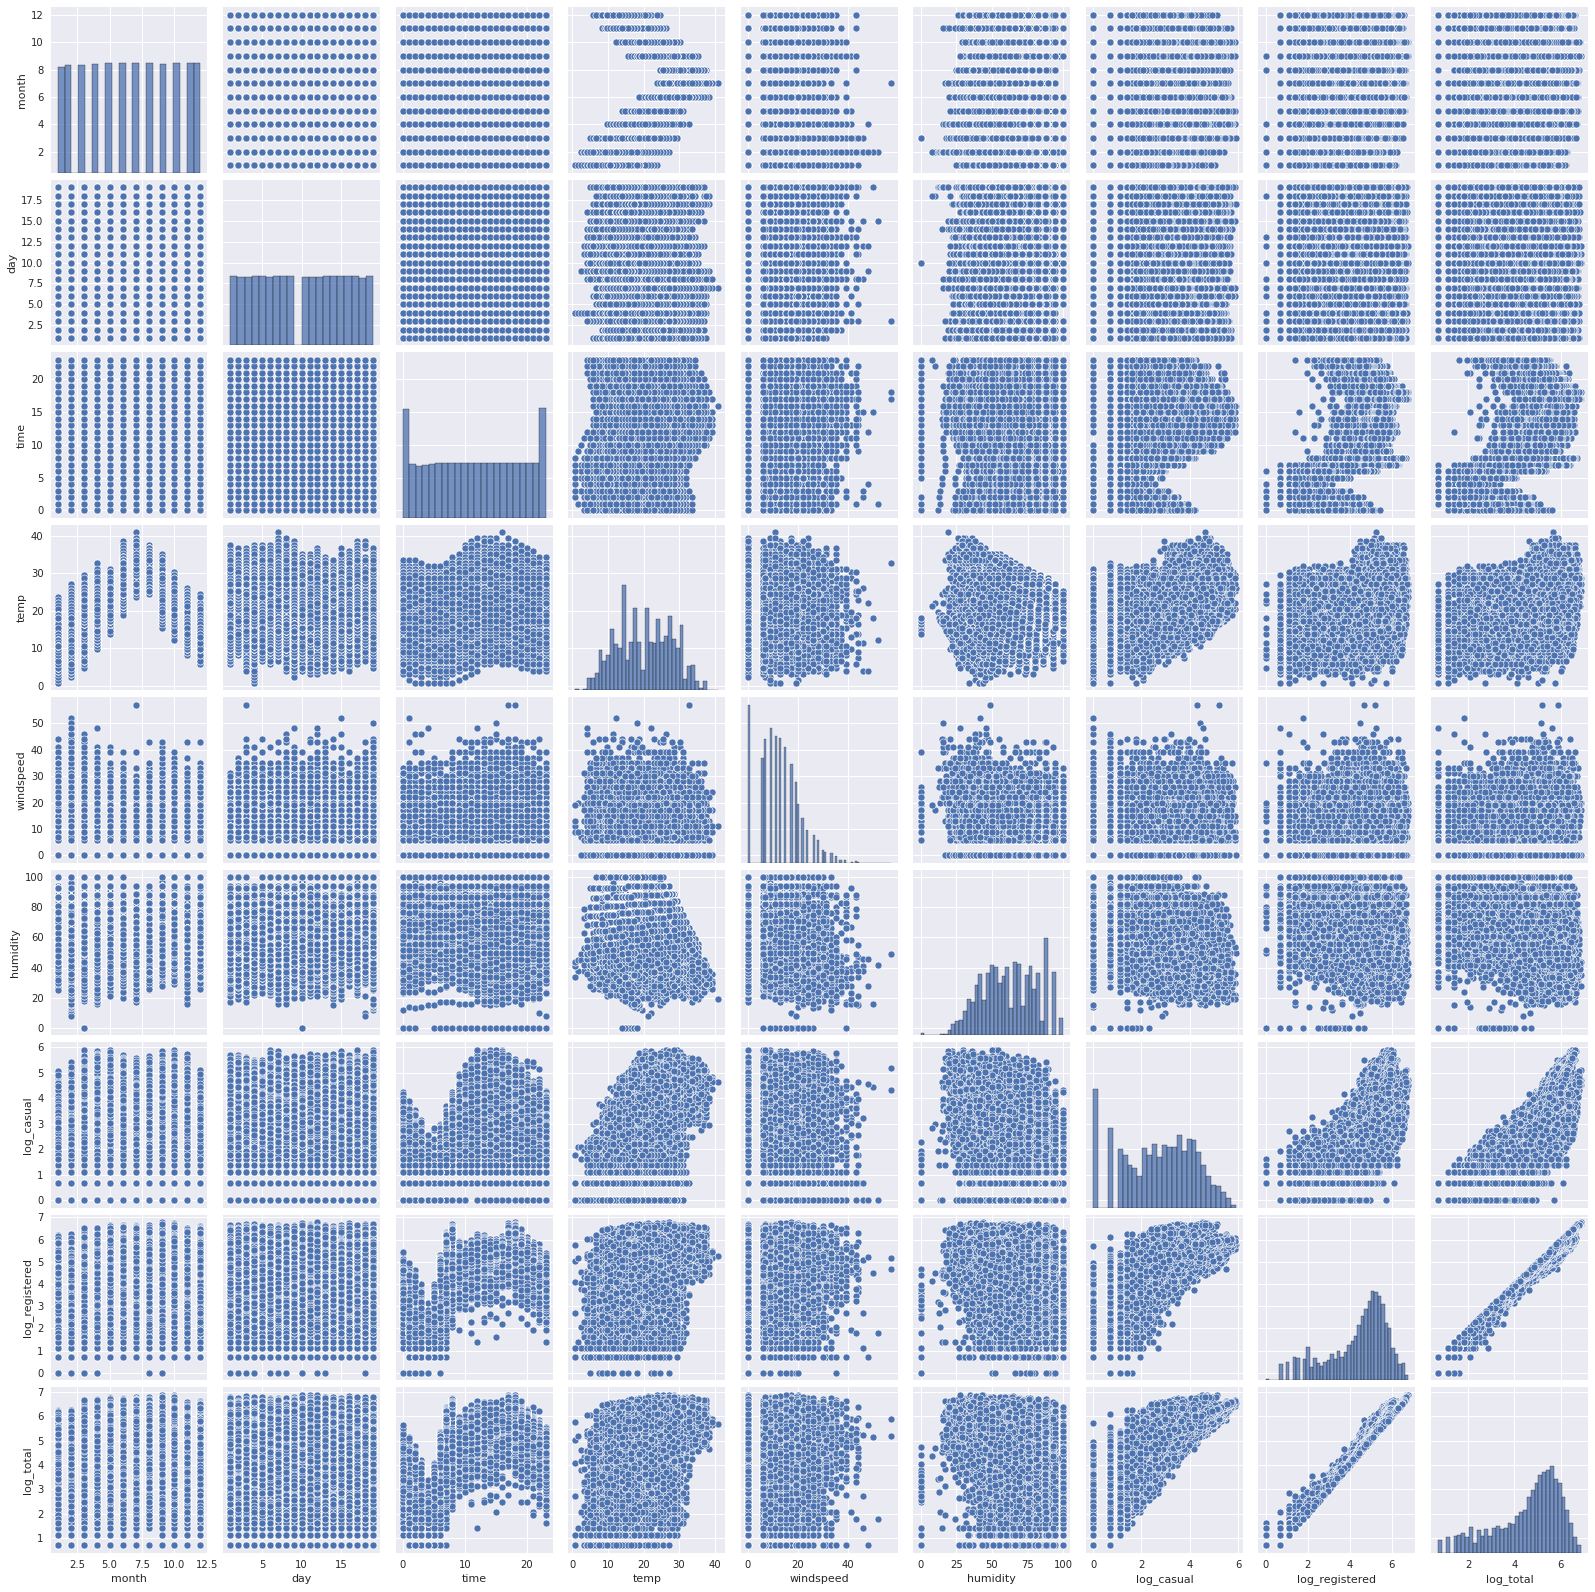

In [33]:
log_num_att = ['month', 'day', 'time', 'temp', 'windspeed', 'humidity', "log_casual", 'log_registered', 'log_total']
sns.pairplot(dat[log_num_att])
plt.show()

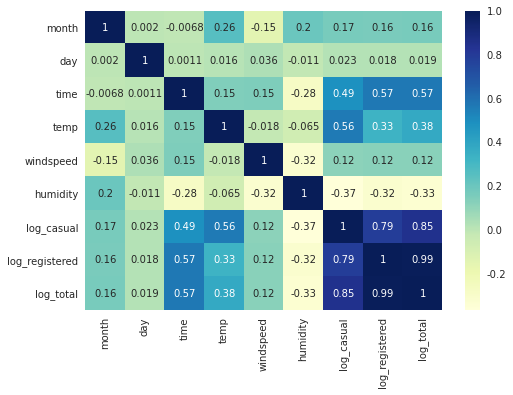

In [34]:
sns.heatmap(dat[log_num_att].corr(),cmap='YlGnBu', annot=True)
plt.show()

## 3. Feature 분석

### 1) Categorical Feature 분석

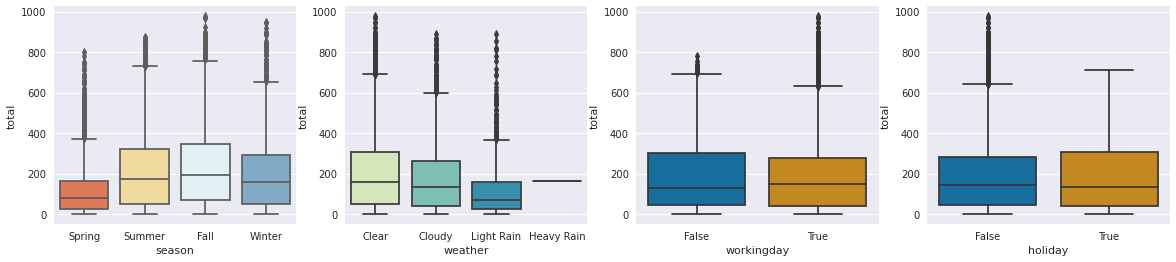

In [35]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
sns.boxplot(x='season', y = 'total', ax=axes[0], data = dat, palette = 'RdYlBu')
sns.boxplot(x='weather', y = 'total', ax=axes[1], data = dat, palette = 'YlGnBu')
sns.boxplot(x='workingday', y = 'total', ax=axes[2], data = dat, palette = 'colorblind')
sns.boxplot(x='holiday', y = 'total', ax=axes[3], data = dat, palette = 'colorblind')
plt.show()

* Categorical한 feature들에 대해 boxplot을 그려보았다. 

1) 계절성 존재: 봄보다는 여름이나 가을에 이용자수가 유의미하게 많음을 확인할 수 있었다.

2) 날씨성 존재: 맑은날일수록 이용자가 많았고, 날씨가 좋지 않을 수록 이용자 수가 확연히 줄어듦을 관찰할 수 있었다.

3) 근무일 여부에 따른 차이는 크지 않았으나, 근무일인 경우 이용자 수가 조금 더 많았다.

4) 휴일 여부에 따른 차이 또한 크지 않았으나, 휴일이 아닌 경우 이용자수가 조금 더 많았다.

### 2) Time Series Feature 분석

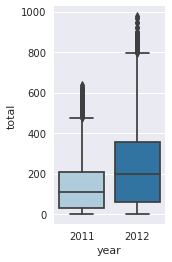

In [36]:
f, axes = plt.subplots( figsize=(2, 4))
sns.boxplot(x='year', y = 'total', data = dat, palette = 'Paired')
plt.show()

2011년보다 2012년에 이용자수가 증가함을 확인할 수 있다.

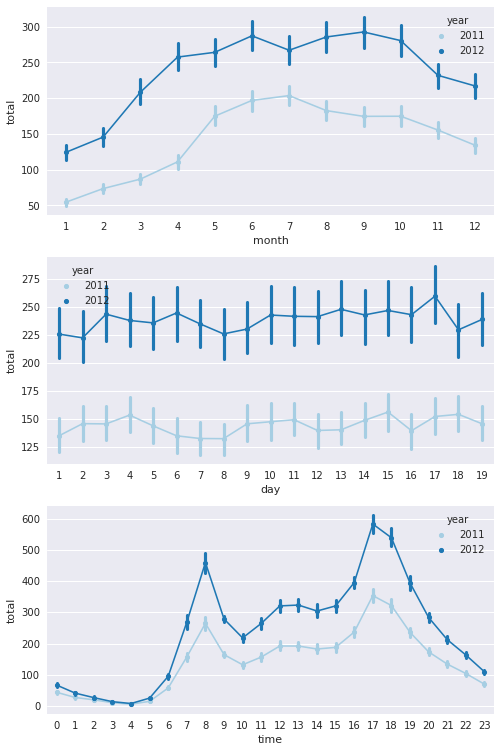

In [37]:
f, axes = plt.subplots(ncols=1, nrows=3, figsize=(8, 13))
sns.pointplot(x='month', y = 'total', ax=axes[0], data = dat, palette = 'Paired', hue = 'year', scale = 0.5)
sns.pointplot(x='day', y = 'total', ax=axes[1], data = dat, palette = 'Paired', hue = 'year', scale = 0.5)
sns.pointplot(x='time', y = 'total', ax=axes[2], data = dat, palette = 'Paired', hue = 'year', scale = 0.5)
plt.show()

날짜에 대한 편차는 크게 나타나지 않았지만 월이나 시간에 따른 차이는 확인할 수 있었다.

### 3) Seasonal Feature 분석

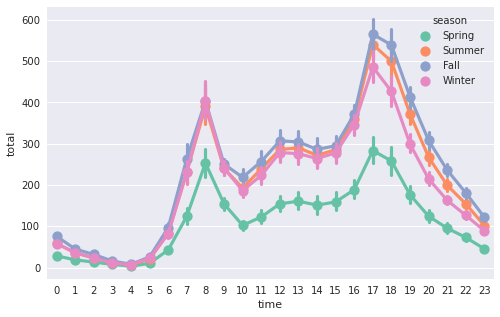

In [46]:
f, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
g = sns.pointplot(x='time', y = 'total', data = dat, hue = 'season', palette='Set2')
plt.show()

계절마다 사람들이 이용하는 시간대가 다른지 확인해보았으나 전체적인 양상에 큰 차이는 없었다.

다만, 봄이 다른 계절보다 전반적으로 이용자수가 적은 것이 나타났다.

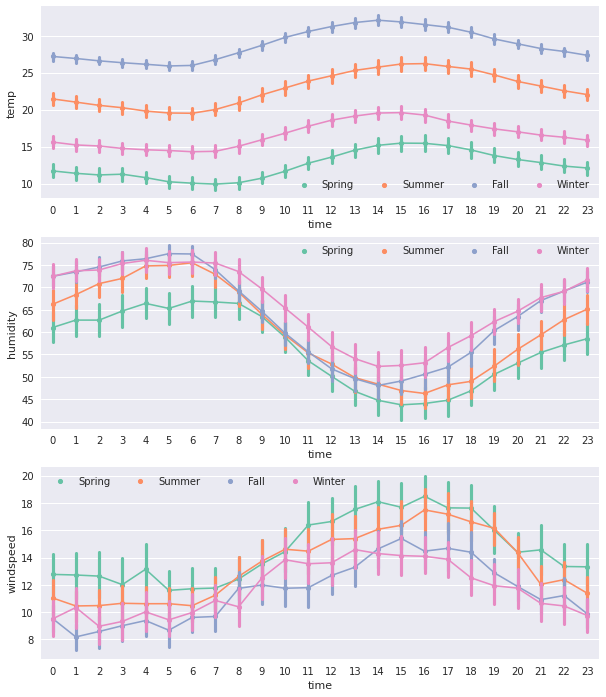

In [58]:
f, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,12))
g = sns.pointplot(x='time', y = 'temp', data = dat, hue = 'season', palette='Set2', ax = axes[0], scale = 0.5)
axes[0].legend(ncol=4)
g = sns.pointplot(x='time', y = 'humidity', data = dat, hue = 'season', palette='Set2', ax = axes[1], scale = 0.5)
axes[1].legend(ncol=4)
g = sns.pointplot(x='time', y = 'windspeed', data = dat, hue = 'season', palette='Set2', ax = axes[2], scale = 0.5)
axes[2].legend(ncol=4)
plt.show()

시간대에 따른 온도, 습도, 풍속 그래프를 계절별로 표시해보았다.

이 지역은, 봄이 가장 춥고 바람이 세게 부는 것으로 나타났다. 풍속이 13.9m/s이상이면 큰 나무 전체가 흔들리고, 바람에 맞서 걷는 것이 힘든 정도라고 한다. 즉, 봄에는 바람이 강하게 불고 기온이 상대적으로 낮기 때문에 이용자수가 유의미하게 적은 것으로 추정된다.

### 4) Weather Feature 분석

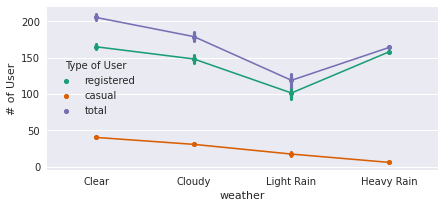

In [91]:
from numpy import median
f, axes = plt.subplots(nrows=1, figsize=(7, 3))
df = dat.melt('weather', ['registered', 'casual', 'total'])
sns.pointplot(x='weather', y = 'value', ax=axes, data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
axes.legend(title = 'Type of User')
axes.set_ylabel('# of User')

plt.show()

날씨에 따른 이용자수의 변화를 그래프로 나타내었다. 
1) 날씨가 맑을 때 이용자수가 가장 많았다.

2) 구름이 낀 날에는 이용자수가 조금 감소하였다.

3) 가벼운 비가 내리는 날에 registered 이용자의 수가 최저를 기록하였다.

4) 비가 많이 오는 날에 casual이용자수의 수는 감소하지만 오히려 registered 이용자수가 증가함을 볼 수 있었다.

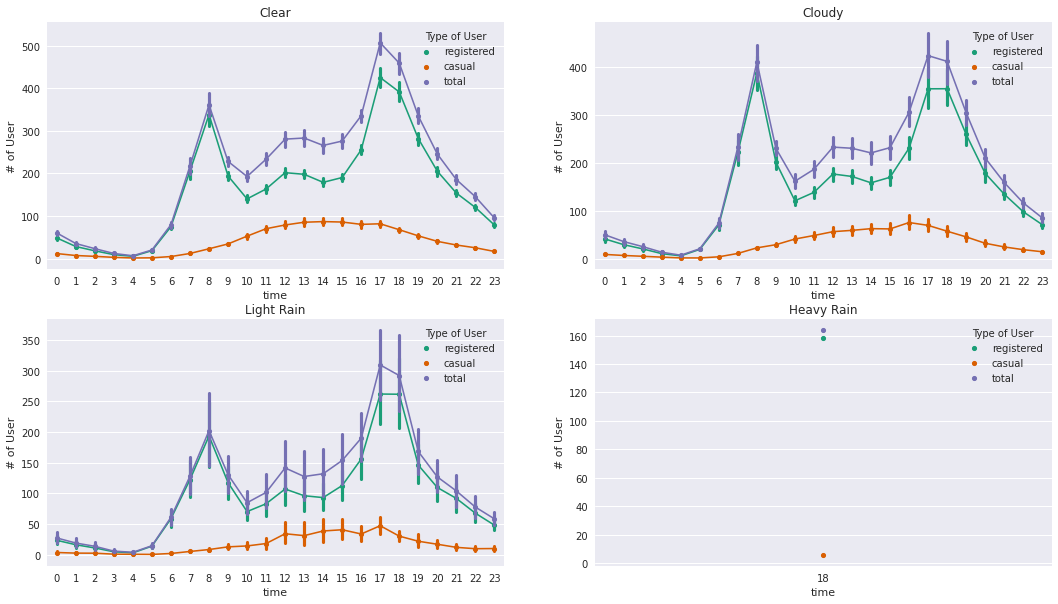

In [102]:
from numpy import median
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
df = dat[dat.weather=='Clear'].melt('time', ['registered', 'casual', 'total'])
sns.pointplot(x='time', y = 'value', ax=axes[0][0], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
axes[0][0].set_title('Clear')
axes[0][0].legend(title = 'Type of User')
axes[0][0].set_ylabel('# of User')
df = dat[dat.weather=='Cloudy'].melt('time', ['registered', 'casual', 'total'])
sns.pointplot(x='time', y = 'value', ax=axes[0][1], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
axes[0][1].set_title('Cloudy')
axes[0][1].legend(title = 'Type of User')
axes[0][1].set_ylabel('# of User')
df = dat[dat.weather=='Light Rain'].melt('time', ['registered', 'casual', 'total'])
sns.pointplot(x='time', y = 'value', ax=axes[1][0], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
axes[1][0].set_title('Light Rain')
axes[1][0].legend(title = 'Type of User')
axes[1][0].set_ylabel('# of User')
df = dat[dat.weather=='Heavy Rain'].melt('time', ['registered', 'casual', 'total'])
sns.pointplot(x='time', y = 'value', ax=axes[1][1], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
axes[1][1].set_title('Heavy Rain')
axes[1][1].legend(title = 'Type of User')
axes[1][1].set_ylabel('# of User')

plt.show()

In [99]:
dat[dat.weather == 'Heavy Rain']

season holiday workingday     weather  temp  humidity  windspeed  \
5631  Spring   False       True  Heavy Rain   8.2        86     6.0032   

      casual  registered  total        date  time  year  month  day  \
5631       6         158    164  2012-01-09    18  2012      1    9   

      temp_diff  log_registered  log_casual  log_total  
5631     -3.165        5.068904     1.94591   5.105945

Heavy Rain때 registered 이용자 수가 증가한 이유를 알아보기 위해 날씨별로 시간 vs 이용자수 그래프를 그려보았다. 그 결과 Heavy Rain에 대한 데이터가 하나뿐이라는 사실을 발견할 수 있었다.

In [110]:
dat[(dat.year==2012) & (dat.month == 1) & (dat.day == 9)]

season holiday workingday     weather   temp  humidity  windspeed  \
5613  Spring   False       True       Clear   9.84        60    15.0013   
5614  Spring   False       True       Clear   9.84        60     8.9981   
5615  Spring   False       True       Clear   9.84        56     8.9981   
5616  Spring   False       True       Clear   9.84        52    11.0014   
5617  Spring   False       True       Clear   9.02        64     7.0015   
5618  Spring   False       True      Cloudy   8.20        64     6.0032   
5619  Spring   False       True      Cloudy   9.02        60     8.9981   
5620  Spring   False       True      Cloudy   9.02        60     7.0015   
5621  Spring   False       True      Cloudy   9.02        55     6.0032   
5622  Spring   False       True      Cloudy   9.02        64     0.0000   
5623  Spring   False       True       Clear   9.84        60     0.0000   
5624  Spring   False       True      Cloudy  10.66        56     6.0032   
5625  Spring   False       True      Cloudy  10.66        56     7.0015   
5626  Spring   False       True      Cloudy  10.66        56     7.0015   
5627  Spring   False       True  Light Rain   9.02        75    11.0014   
5628  Spring   False       True  Light Rain   9.02        75    11.0014   
5629  Spring   False       True  Light Rain   9.02        87     6.0032   
5630  Spring   False       True  Light Rain   9.02        87     0.0000   
5631  Spring   False       True  Heavy Rain   8.20        86     6.0032   
5632  Spring   False       True  Light Rain   8.20        93     6.0032   
5633  Spring   False       True      Cloudy   8.20        86     6.0032   
5634  Spring   False       True      Cloudy   8.20        93     0.0000   
5635  Spring   False       True      Cloudy   8.20        92     7.0015   
5636  Spring   False       True      Cloudy   9.02        87     7.0015   

      casual  registered  total        date  time  year  month  day  \
5613       3          12     15  2012-01-09     0  2012      1    9   
5614       1           4      5  2012-01-09     1  2012      1    9   
5615       2           3      5  2012-01-09     2  2012      1    9   
5616       0           3      3  2012-01-09     3  2012      1    9   
5617       0           4      4  2012-01-09     4  2012      1    9   
5618       0          21     21  2012-01-09     5  2012      1    9   
5619       3          85     88  2012-01-09     6  2012      1    9   
5620       1         239    240  2012-01-09     7  2012      1    9   
5621      13         407    420  2012-01-09     8  2012      1    9   
5622       9         188    197  2012-01-09     9  2012      1    9   
5623      13          95    108  2012-01-09    10  2012      1    9   
5624       6          82     88  2012-01-09    11  2012      1    9   
5625      10          93    103  2012-01-09    12  2012      1    9   
5626       3          77     80  2012-01-09    13  2012      1    9   
5627       5          45     50  2012-01-09    14  2012      1    9   
5628       5          64     69  2012-01-09    15  2012      1    9   
5629       3          46     49  2012-01-09    16  2012      1    9   
5630       5         147    152  2012-01-09    17  2012      1    9   
5631       6         158    164  2012-01-09    18  2012      1    9   
5632       3         187    190  2012-01-09    19  2012      1    9   
5633       5         127    132  2012-01-09    20  2012      1    9   
5634       1          78     79  2012-01-09    21  2012      1    9   
5635       8          54     62  2012-01-09    22  2012      1    9   
5636       1          51     52  2012-01-09    23  2012      1    9   

      temp_diff  log_registered  log_casual  log_total  
5613     -1.525        2.564949    1.386294   2.772589  
5614     -2.280        1.609438    0.693147   1.791759  
5615     -2.280        1.386294    1.098612   1.791759  
5616     -2.280        1.386294    0.000000   1.386294  
5617     -3.100        1.609438    0.000000   1.609438  
5618     -3.

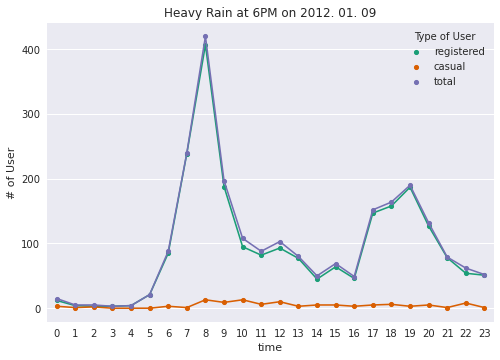

In [109]:
df = dat[(dat.year==2012) & (dat.month == 1) & (dat.day == 9)].melt('time', ['registered', 'casual', 'total'])
sns.pointplot(x='time', y = 'value', data = df, hue = 'variable', palette = 'Dark2', scale = 0.5)
plt.title('Heavy Rain at 6PM on 2012. 01. 09')
plt.legend(title = 'Type of User')
plt.ylabel('# of User')
plt.show()

Heavy Rain이 내린 날짜의 이용자수 추이 그래프를 그려보았다. 오후 2시부터 Light Rain이 내리고 오후 6시에 Heavy Rain이 한시간 가량 내렸다. Heavy Rain이 지속된 시간이 길지 않은 것을 보아 **소나기**인 것으로 추정된다. 즉, 이때 퇴근을 하던 사람들이 비가 많이 오지 않아 자전거를 이용하였는데 갑자기 소나기가 내려서 반납하지 못하고 계속 자전거를 이용한 것으로 보인다.

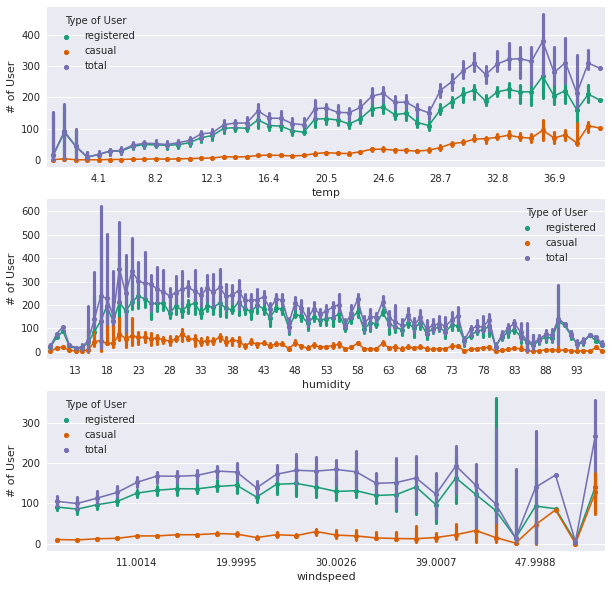

In [84]:
from numpy import median
f, axes = plt.subplots(nrows=3, figsize=(10, 10))
df = dat.melt('temp', ['registered', 'casual', 'total'])
sns.pointplot(x='temp', y = 'value', ax=axes[0], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5, estimator = median)
axes[0].set_xticks(axes[0].get_xticks()[4::5])
axes[0].legend(title = 'Type of User')
axes[0].set_ylabel('# of User')
df = dat.melt('humidity', ['registered', 'casual', 'total'])
sns.pointplot(x='humidity', y = 'value', ax=axes[1], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5, estimator = median)
axes[1].set_xticks(axes[1].get_xticks()[4::5])
axes[1].legend(title = 'Type of User')
axes[1].set_ylabel('# of User')
df = dat.melt('windspeed', ['registered', 'casual', 'total'])
sns.pointplot(x='windspeed', y = 'value', ax=axes[2], data = df, hue = 'variable', palette = 'Dark2', scale = 0.5, estimator = median)
axes[2].set_xticks(axes[2].get_xticks()[4::5])
axes[2].legend(title = 'Type of User')
axes[2].set_ylabel('# of User')
plt.show()

온도, 습도, 풍속에 따른 이용자수의 그래프를 그려보았다.

* 온도는 섭씨 32~36도 구간에서 가장 높은 이용자수가 나타났다.
* 습도는 18~33% 구간에서 가장 높은 이용자수가 나타났다.
* 풍속에 의한 영향은 크지 않은 것으로 추정된다.


    +) 풍속이 너무 높은 점이 이상하여 kaggle 원본 데이터셋을 찾아본 결과, 온도, 습도, 풍속은 모두 normalized된 값이므로 단위를 명확히 알 수 없었다.

### 5) WorkingDay or Not

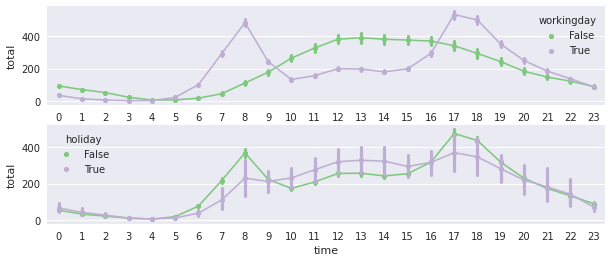

In [79]:
f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 4))
sns.pointplot(x='time', y = 'total', ax=axes[0], data = dat, palette = 'Accent', hue = 'workingday', scale = 0.5)
# axes[0].set_xticklabels(['False', 'True'])
sns.pointplot(x='time', y = 'total', ax=axes[1], data = dat, palette = 'Accent', hue = 'holiday', scale = 0.5)
# axes[1].set_legend(['False', 'True'])
plt.show()

Workingday인 경우와 그렇지 않은 경우, 시간대에 따른 이용자수의 양상이 차이나는 것을 확인할 수 있었다.

* Workingday인 경우는 아침 8시경과 오후 5~6시 경 이용자수가 가장 많았다. 이는 출퇴근시간에 본 공유자전거 서비스를 이용하는 고객들이 많음을 알 수 있다.
* Workingday가 아닌 경우(공휴일 혹은 주말)는 오후 1~4시 경 이용자수가 가장 많았다. 즉, 여가를 즐기기 위해 자전거를 이용한다고 추측할 수 있다.

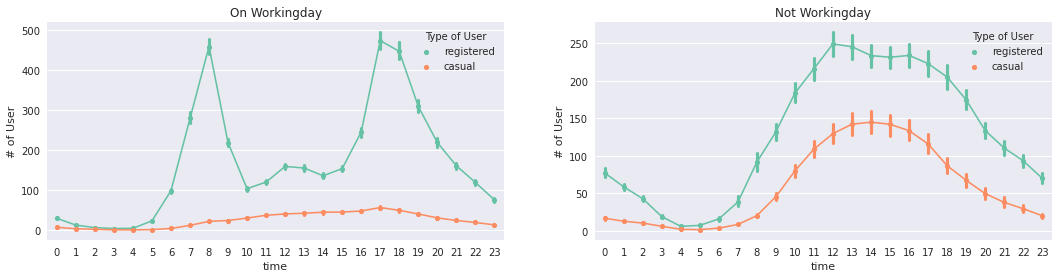

In [77]:
f, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 4))
df = dat[dat.workingday=='True'].melt('time', ['registered', 'casual'])
sns.pointplot(x='time', y = 'value', ax=axes[0], data = df, palette = 'Set2', hue = 'variable', scale = 0.5)
axes[0].legend(title = 'Type of User')
axes[0].set_ylabel('# of User')
axes[0].set_title('On Workingday')
# axes[0].set_xticklabels(['False', 'True'])
df = dat[dat.workingday=='False'].melt('time', ['registered', 'casual'])
sns.pointplot(x='time', y = 'value', ax=axes[1], data = df, palette = 'Set2', hue = 'variable', scale = 0.5)
axes[1].set_title('Not Workingday')
axes[1].legend(title = 'Type of User')
axes[1].set_ylabel('# of User')
# axes[1].set_legend(['False', 'True'])
plt.show()

위의 가설을 검증하기 위해, Workingday인 경우와 그렇지 않은 경우 사용자의 유형별 이용자수에 대한 그래프를 그려보았다.

* Workingday인 경우 registered 사용자가 아침 8시경과 오후 5~6시 경우 고점을 기록하는 것을 보아 출퇴근용으로 공유자전거 서비스를 이용하는 경우가 많음을 알 수 있다.
* Workingday가 아닌 경우 casual이용자와 registered 이용자 모두 낮 시간에 증가하는 것을 보아 여가용으로 활용하고 있음을 알 수 있다.